<a href="https://colab.research.google.com/github/fragmento/Mod_4_-Andres_Mendel/blob/andres_chaves/Notebooks/Data_processing_data_exploration_AlexNet_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Chest x rays to identify Pneumonia

For this exercice we will be working with a dataset uploaded from Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

Let's explore the data.

In [1]:
#Basic uploads
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread #to read image from

import seaborn as sns
import os

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jun 18 11:35:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Exploring the Data

Original Data source:
Dataset containg three folders ['test', 'train', 'val']. Each folder contains 2 folders ['PNEUMONIA', 'NORMAL']. 

Number of Train samples : (3875, Pneumonia)(1341, Normla) - 5216

Number of Test samples: (390, Pneumonia)(234, Normla) - 624

Number of val samples: (8, Pneumonia)(8, Normla) - 16

In [4]:
path_to_data = '/content/drive/My Drive/Colab Notebooks/Mod_4_Andres_Mendel/Data/chest_xray'

In [5]:
# chequin what is inside the chest_xray directory
os.listdir(path_to_data)

['.DS_Store', 'val', 'train', 'test']

In [6]:
os.listdir(path_to_data+'/test')

['NORMAL', 'PNEUMONIA']

In [7]:
#Number of xrays with pneumonia in the test 
len(os.listdir(path_to_data+'/train/PNEUMONIA'))
#os.listdir(path_to_data+'/train/PNEUMONIA')

3875

In [8]:
#Number of normal xrays
len(os.listdir(path_to_data+'/train/NORMAL'))

1341

### Visualizing the data


In [9]:
#Getting the first normal/sick xray
normal_img_path = path_to_data+'/train/NORMAL'
os.listdir(normal_img_path)[2]

'IM-0511-0001-0001.jpeg'

In [10]:
sick_img_path = path_to_data+'/train/PNEUMONIA'
os.listdir(sick_img_path)[2]

'person583_bacteria_2408.jpeg'

In [11]:

norm_img = imread(normal_img_path+'/NORMAL2-IM-0927-0001.jpeg')
sick_img = imread(sick_img_path+'/person63_bacteria_306.jpeg')

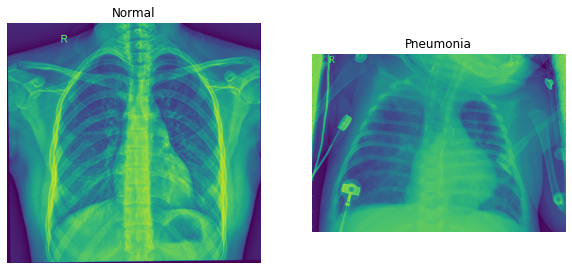

In [12]:
def pic_side_by_side(pic1, pic2, title1, title2):
    """
    Takes two pictures and two titles for them and outputs two pictures side by side
    """
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(pic1)
    ax1.set_title(title1)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(pic2)
    ax2.set_title(title2)
    plt.axis('off');
    
pic_side_by_side(norm_img,sick_img,'Normal','Pneumonia')    

### Geting a sence of the diference in images sizes

In [ ]:
norm_img.shape

(2234, 2359)

In [ ]:
sick_img.shape

(736, 1048)

In [ ]:
sick_img_path

'/content/drive/My Drive/Colab Notebooks/Mod_4_Andres_Mendel/Data/chest_xray/train/PNEUMONIA'

In [ ]:
dim = []
for image_filename in os.listdir(sick_img_path):
    
    img = imread(sick_img_path+'/'+image_filename)
    dim.append(img.shape)

In [ ]:
#dim

In [ ]:
x_dim =[]
y_dim =[]
for img_tuple in dim:
    x_dim.append(img_tuple[0])
    y_dim.append(img_tuple[1])


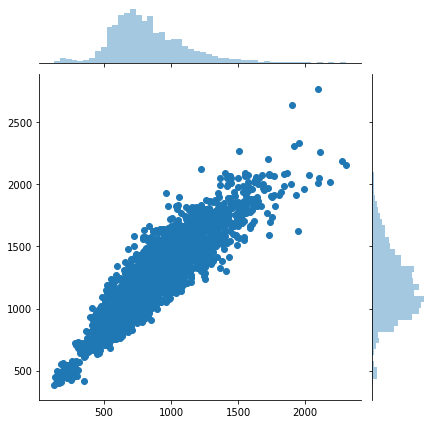

In [ ]:
sns.jointplot(x_dim, y_dim);

In [ ]:
#mean value for image size
np.mean(x_dim),np.mean(y_dim)

(825.0268387096775, 1200.4836129032258)

In [ ]:
# image_shape = (800,1200)

### From RGB to Grayscale

From the exploration above image 14 is RGB type

In [20]:
os.listdir(sick_img_path)[14]

'person531_bacteria_2241.jpeg'

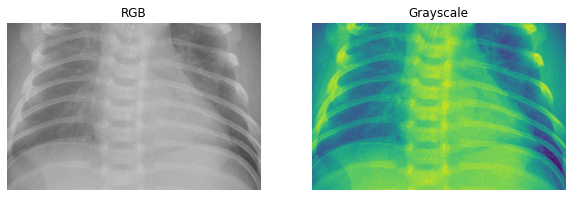

In [23]:
def rgb2gray(rgb):
    """
    Transforms RGB to Grayscale (x,y,colors) -> (x,y)
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = imread(sick_img_path+'/person69_bacteria_338.jpeg')     
grey = rgb2gray(img)    

pic_side_by_side(img,grey,'RGB','Grayscale')  

## Dataset preprocessing
Keras dataset preprocessing utilities, located at `tf.keras.preprocessing`, help you go from raw data on disk to a tf.data.Dataset object that can be used to train a model.

The data folder that looks like this:

`
Data/
   NORMAL/
      a_image_1.jpg
      a_image_2.jpg
   PNEUMONIA/
      b_image_1.jpg
      b_image_2.jpg
`      

### ImageDataGenerator
Generate batches of tensor image data with real-time data augmentation.

The data will be looped over (in batches).

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
from tensorflow.python.client import device_lib
#device_lib.list_local_devices()
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
#exploring load_function
img2 = load_img(sick_img_path+'/'+ os.listdir(sick_img_path)[1290],
                                      color_mode="grayscale", 
                                      target_size=(256,256), interpolation="nearest")
type(img2)

img3 = load_img(normal_img_path+'/' +os.listdir(normal_img_path)[650],
                                      color_mode="grayscale", 
                                      target_size=(256,256), interpolation="nearest")

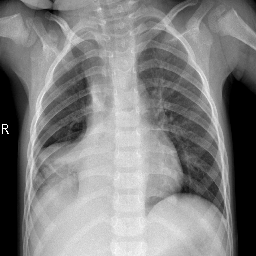

In [13]:
# Pneumonia x-ray
img2 

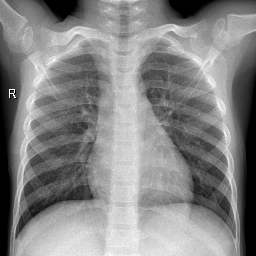

In [14]:
#Normal x-ray
img3

In [15]:
#explorting img_to_array
img2 = img_to_array(img2)
img2.shape

(256, 256, 1)

In [16]:
#help(load_img)

## Explorting Image transformation


In [17]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

image_gen2 = ImageDataGenerator(rescale=1./255)

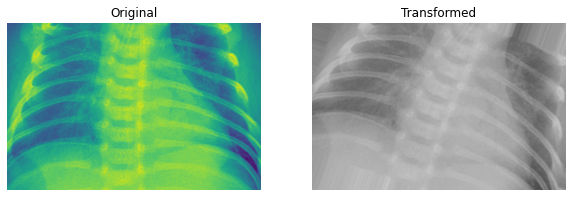

In [24]:
gray_new = image_gen.random_transform(img)

pic_side_by_side(grey,gray_new,'Original','Transformed');

In [25]:
# cheking the flow from director function
image_gen.flow_from_directory(path_to_data+'/train')
image_gen.flow_from_directory(path_to_data+'/test');

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Model

## Model Implemetation

The first model will be a reacreation of AlexNet architecture. This model won the 2012 ImageNet ILSVRC challenge by a large margin: it achieved a top-five error rate of 17%, while the second best achieved only 26%! It was developed by Alex Krizhevsky (hence the name), Ilya Sutskever, and Geoffrey Hinton. It is similar to LeNet-5, only much larger and deeper, and it was the first to stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer. 

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 618). O'Reilly Media. Kindle Edition. 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


# Implementation of AlexNet Model

model = Sequential()

#model.add(InputLayer( input_shape=(227, 227,3)))

#C1
model.add(Conv2D(64, (4, 4),strides=(3,3),padding='valid',input_shape=(227, 227,3)))
model.add(Activation('relu'))
#P1
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))


#C2
model.add(Conv2D(128, (4, 4),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#P2
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

#C3
model.add(Conv2D(256, (3, 3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#C4
model.add(Conv2D(256, (3, 3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#C5
model.add(Conv2D(128, (3, 3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#P3
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
# the model so far outputs 3D feature maps (height, width, features)



model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#1st fully connectd layer
model.add(Dense(128))
model.add(Activation('relu'))
#Dropout leyer
model.add(Dropout(0.5))

#2nd fully connectd layer
model.add(Dense(32))
model.add(Activation('relu'))
#Dropout leyer
model.add(Dropout(0.5))



model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using TensorFlow backend.


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=8)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 64)        3136      
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       131200    
_________________________________________________________________
activation_2 (Activation)    (None, 34, 34, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)      

In [9]:
batch_size = 256
target_shape = (227,227)


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        path_to_data+'/train',  # this is the target directory
        target_size=target_shape,  # all images will be resized to 227x227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data

validation_generator = test_datagen.flow_from_directory( 
        path_to_data+'/test',
        target_size=target_shape,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose =1,
        workers = -1,
      )
# always save your weights after training or during training)
model.save_weights('alex_try_weights.h5') 
model.save('alex_try.h5')

Epoch 1/10
21/21 [==============================] - 1174s 56s/step - loss: 0.6016 - accuracy: 0.7375 - val_loss: 0.6692 - val_accuracy: 0.6250
Epoch 2/10
21/21 [==============================] - 132s 6s/step - loss: 0.5828 - accuracy: 0.7425 - val_loss: 0.6288 - val_accuracy: 0.6250
Epoch 3/10
21/21 [==============================] - 108s 5s/step - loss: 0.5467 - accuracy: 0.7460 - val_loss: 0.5799 - val_accuracy: 0.6250
Epoch 4/10
21/21 [==============================] - 108s 5s/step - loss: 0.4453 - accuracy: 0.7859 - val_loss: 0.5030 - val_accuracy: 0.7821
Epoch 5/10
21/21 [==============================] - 107s 5s/step - loss: 0.3578 - accuracy: 0.8401 - val_loss: 0.4869 - val_accuracy: 0.7837
Epoch 6/10
21/21 [==============================] - 105s 5s/step - loss: 0.3216 - accuracy: 0.8643 - val_loss: 0.2865 - val_accuracy: 0.8526
Epoch 7/10
21/21 [==============================] - 105s 5s/step - loss: 0.3150 - accuracy: 0.8675 - val_loss: 0.2999 - val_accuracy: 0.8413
Epoch 8/10


## Evaluating the Model

In [27]:
history = pd.DataFrame(model.history.history)

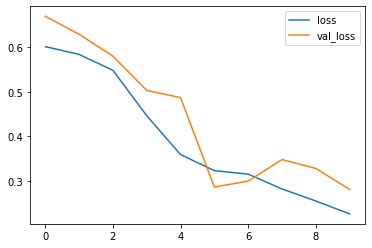

In [28]:
history[['loss', 'val_loss']].plot();

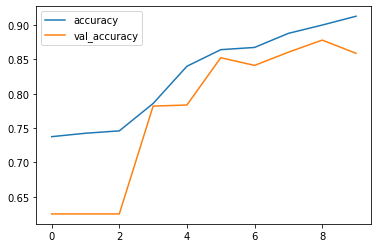

In [29]:
history[['accuracy', 'val_accuracy']].plot();

In [12]:
model.evaluate_generator(validation_generator)

[0.2813431918621063, 0.8589743375778198]

In [13]:
#testing the 624 images
#We first noremalize and then reshape the images to the approtiate (227,227)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory( 
        path_to_data+'/test',
        target_size=(227,227),
        class_mode='binary',
        shuffle=False )

Found 624 images belonging to 2 classes.


In [14]:
pred_prob = model.predict(test_generator)
#pred_prob

In [15]:
prediction = pred_prob >0.5
#prediction

In [17]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score

In [19]:
print(classification_report(test_generator.classes,prediction))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       234
           1       0.84      0.96      0.89       390

    accuracy                           0.86       624
   macro avg       0.88      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624



In [20]:
confusion_matrix(validation_generator.classes,prediction)

array([[161,  73],
       [ 15, 375]])

In [32]:
recall_score(validation_generator.classes,prediction)

0.9615384615384616

In [33]:
precision_score(validation_generator.classes,prediction)

0.8370535714285714

### Testing on 16 Unseen images

In [21]:
#test set 16 images
#We first noremalize and then reshape the images to the approtiate (227,227)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory( 
        path_to_data+'/val',
        target_size=(227,227),
        class_mode='binary',
        shuffle=False )

Found 16 images belonging to 2 classes.


In [22]:
# geting the probalilites of the 0 == Normal 1==Pneumonia
test_prob = model.predict(test_generator)
test_prob

array([[0.88475704],
       [0.23308593],
       [0.7076319 ],
       [0.8423125 ],
       [0.9937552 ],
       [0.886893  ],
       [0.0640174 ],
       [0.01278539],
       [0.9968727 ],
       [0.9933669 ],
       [0.9976579 ],
       [0.9915109 ],
       [0.9971841 ],
       [0.99834704],
       [0.77766097],
       [0.9992849 ]], dtype=float32)

In [23]:
# seting a booundary for the prediction False == 0 == Normal True == 1 == Pneumonia
test_predic = test_prob >.5

In [24]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
print(classification_report(test_generator.classes,test_predic))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.62      1.00      0.76         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16



In [26]:
print(confusion_matrix(test_generator.classes,test_predic))

[[3 5]
 [0 8]]


In [35]:
precision_score(test_generator.classes,test_predic)

0.6153846153846154

In [36]:
recall_score(test_generator.classes,test_predic)

1.0